# TASK 1 : Prediction using Supervised ML

## Name : Kaushik Shrinjay Sanjay
> <b>Dataset used :</b> http://bit.ly/w-data <br>
> <b>Description :</b> Predict the percentage score of a student depending upon the number of hours of study.

In [1]:
#Import the necessary libraries 
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing
from sklearn.model_selection import train_test_split

#importing model
from sklearn.linear_model import LinearRegression

#Evaluation
from sklearn import metrics

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.shape

(25, 2)

### Visualization

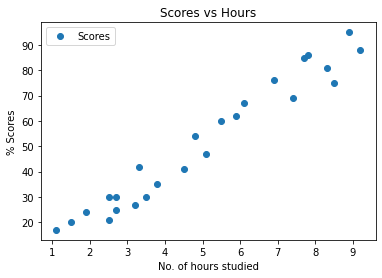

In [5]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Scores vs Hours')
plt.xlabel('No. of hours studied')
plt.ylabel('% Scores')
plt.show()

We can see from the plot that the 2 features show a linear relationship.

### Preprocessing

In [6]:
X = df.iloc[:,:-1]  #Independent variable
y = df.iloc[:, -1]   #Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [7]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [8]:
y_train.head()

22    35
17    24
24    86
23    76
14    17
Name: Scores, dtype: int64

In [9]:
y_test.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

### Training the model

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

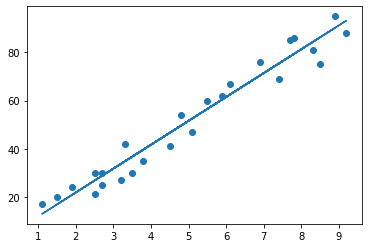

In [11]:
line = reg.coef_*X + reg.intercept_                 #Equation of line ---> y = ((slope) * x) + intercept || y = mx + c
plt.scatter(X, y)                                   # m = coefficient of X and c = intercept
plt.plot(X, line)
plt.show() 

From the plot we can see that the line fits the data points in a manner that minimizes the orthogonal distances from the points to the line.

### Accuracy and Evaluation

In [12]:
train_acc_reg = round(reg.score(X_train, y_train)*100, 2)
print('Training Accuracy : ', train_acc_reg)

Training Accuracy :  95.16


In [13]:
test_acc_reg = round(reg.score(X_test, y_test)*100, 2)
print('Testing Accuracy : ', test_acc_reg)

Testing Accuracy :  94.55


In [14]:
y_pred = reg.predict(X_test)

In [15]:
print('The Mean Absolute Error is : ', metrics.mean_absolute_error(y_test,y_pred))

The Mean Absolute Error is :  4.183859899002975


### Task

In [19]:
print('When a student studies 9.25 hours per day, the expected score is :', reg.predict([[9.25]]), '%')

When a student studies 9.25 hours per day, the expected score is : [93.69173249] %
